In [1]:
#HYBRID DEEP LEARNING MODEL


#PART 1 - IDENTIFY FRAUDS WITH SELF-ORGANIZING MAP

#PART 2 - GOING FROM UNSUPERVISED TO SUPERVISED DEEP LEARNING

#USE RESULTS OF SOM AS INPUTS FOR SUPERVISED MODEL
#PROBABILITIES OF BEING FRAUD FOR EACH CUSTOMER

In [2]:
#PART 1 - UNSUPERVISED DEEP LEARNING BRANCH: SOM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#MINISOM CONTAINS AN IMPLEMENTATION OF SOM
from minisom import MiniSom

df = pd.read_csv("Credit_Card_Applications.csv")

X = df.iloc[:, :-1].values #ALL COLUMNS EXCEPT LAST
y = df.iloc[:, -1].values

#FEATURE SCALING: NORMALISATION
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

#INITIALISE THE SOM
som = MiniSom(
    x=10, y=10, #DIMENSION OF GRID
    input_len = 15, #NUMBER OF FEATURES IN X
    sigma = 1.0, #RADIUS OF NEIGHBORHOOD
    learning_rate = 0.5, #WEIGHT UPDATION 
)

#INITIALISE THE WEIGHTS OF SOM [COORDINATES OF OUTPUT NODES]
som.random_weights_init(X) #DATA FOR TRAINING
som.train_random(
    data = X, #TRAINING DATA
    num_iteration = 100
)

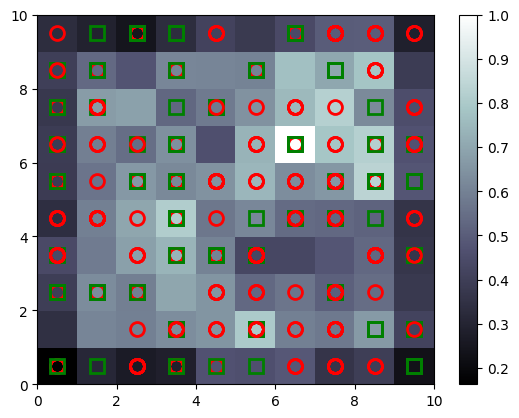

In [3]:
#VISUALISE THE RESULTS: PLOT THE SOM: COLOR BASED ON MID
from pylab import bone, pcolor, colorbar, plot, show

#INITIALISE FIGURE
bone()

#ADD INFORMATION ON MID: COLORS FOR RANGES
pcolor(som.distance_map().T) #TRANSPOSE OF MID

#ADD A LEGEND
colorbar() #NORMALISED MID VALUES

#ADD MARKERS USING LABELS: APPROVED OR NOT APPROVED
markers = ['o', 's'] #CIRCLE & SQUARE
colors = ['r', 'g'] #RED OR GREEN

for i, x in enumerate(X): #GET INDEX & DATA
    #GET WINNING NODE FOR RECORD
    w = som.winner(x)
    
    #PLACE MARKER
    plot(
        w[0]+0.5, w[1]+0.5, #COORDINATES OF CENTER OF NODE
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
        
    )
show()

In [7]:
#RELEVANT FRAUDS ARE THOSE WHO GOT APPROVED
#GET LIST OF CUSTOMERS BY INVERSE-MAPPING

#GET MAPPINGS
mappings = som.win_map(X) # NODE: LIST OF CUSTOMERS

#NODE1: 6, 6. [BOTTOM LEFT POINT]
#NODE2: 3, 1
frauds1 = mappings[(4,2)]
frauds2 = mappings[(3,1)] #LIST OF CUSTOMERS WITH THAT WINNING NODE
# frauds = np.concatenate((frauds1, frauds2), axis = 0) #VERTICAL CONCATENATION
frauds = mappings[(6,6)]

In [ ]:
#LIST OF PROBABLE FRAUDS: CUSTOMER_IDS
frauds = sc.inverse_transform(frauds)

In [ ]:
frauds = frauds.astype(int)

In [ ]:
#GO FROM UNSUPERVISED TO SUPERVISED: NEED A DEPENDENT VARIABLE
frauds
frauds_ids = np.array([x[0] for x in frauds])
frauds_ids

In [20]:
#CREATING THE MATRIX OF FEATURES
customers = df.iloc[:, 1:].values #SAME AS X + APPROVED OR NOT

In [21]:
#CREATING THE DEPENDENT VARIABLE: IS_FRAUD [1/0]
#->USE RESULTS OF SOM

#INITIALISE: ALL 0
is_fraud = np.zeros(len(df))

In [29]:
#PUT 1 FOR CUSTOMER_ID IN FRAUDS
for i in range(0, len(df)):
    #CUSTOMER ID AT INDEX I
    if df.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [34]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
classifier = Sequential()

classifier.add(Dense(units = 2, kernel_initializer = 'uniform',
                    activation = 'relu', input_dim = 15 #NO OF FEATURES
                    ))
    
classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                    activation = 'sigmoid'))
                     
classifier.compile(optimizer = 'adam',
                 loss ='binary_crossentropy',
                 metrics = ['accuracy'])
                     
classifier.fit(customers, is_fraud, batch_size=1, epochs=1)                    

690/690 [==============================] - 1s 875us/step - loss: 0.4176 - accuracy: 0.9942


In [40]:
#MAKE THE PREDICTIONS FROM THE HYBRID DEEP LEARNING MODEL

predicted_probabilities =  classifier.predict(customers)

22/22 [==============================] - 0s 940us/step


In [42]:
#ADD THE CUSTOMER IDS TO THE PROBABILITY ARRAY
predicted_probabilities = np.concatenate(
    (df.iloc[:, 0:1].values, #CREATE A 2D ARRAY INSTEAD OF 1D
    predicted_probabilities), #2D ARRAY
    axis = 1
)

In [44]:
predicted_probabilities

array([[1.57761560e+07, 1.30671889e-01],
       [1.57395480e+07, 1.34675369e-01],
       [1.56628540e+07, 9.61299688e-02],
       ...,
       [1.56754500e+07, 1.84822261e-01],
       [1.57764940e+07, 1.20869078e-01],
       [1.55924120e+07, 1.97975487e-01]])

In [45]:
#SORT THE ARRAY BASED ON THE PROBABILITY COLUMN
predicted_probabilities = predicted_probabilities[
    predicted_probabilities[:, 1].argsort() #COLUMN TO SORT ON
]

In [46]:
predicted_probabilities

array([[1.57997850e+07, 5.20416126e-02],
       [1.56214230e+07, 5.44763245e-02],
       [1.56009750e+07, 6.35198057e-02],
       ...,
       [1.56647930e+07, 2.79452950e-01],
       [1.55861740e+07, 2.84571230e-01],
       [1.55933450e+07, 3.18144500e-01]])

In [49]:
#CHANGE THE CUSTOMERID TO INTEGER
predicted_probabilities[:, 0] = predicted_probabilities[:, 0].astype(int)

In [50]:
predicted_probabilities

array([[1.57997850e+07, 5.20416126e-02],
       [1.56214230e+07, 5.44763245e-02],
       [1.56009750e+07, 6.35198057e-02],
       ...,
       [1.56647930e+07, 2.79452950e-01],
       [1.55861740e+07, 2.84571230e-01],
       [1.55933450e+07, 3.18144500e-01]])